# KAAN GÜNEY KEKLİKÇİ - 24986 

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
cd 

/Users/kaanguney.keklikci


In [16]:
# navigate to the necessary directory 

In [26]:
cd Desktop/Sabancı/"Sophomore Year"/"CS 412"

/Users/kaanguney.keklikci/Desktop/Sabancı/Sophomore Year/CS 412


In [18]:
# directory navigated

In [19]:
# read the file

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [43]:
names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [44]:
dataset = pd.read_csv(url, names=names)

In [45]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [46]:
# at this point, dataset read, keys(attributes) assigned

In [47]:
# dropping "Sample code number" column, unneccessary info, will potentially corrupt the results

In [48]:
dataset.drop(["Sample code number"], axis = 1, inplace = True)

In [49]:
# display the final dataset to be used here
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [63]:
dataset.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [57]:
from sklearn.model_selection import train_test_split

In [73]:
features = dataset.drop(["Class"], axis = 1)
features.head()  # check if Class key dropped

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [74]:
features = features.drop(["Bare Nuclei"], axis = 1) 
features.head()
# object type Bare Nuclei key does not support the classifier metrics
# therefore dropped 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [86]:
X = features # split data into training and test sets separately
y = dataset["Class"]

# %25 for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing k = 5, default
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
# prediction variable for our model
y_pred = KNN.predict(X_test)

In [89]:
# Check performance with accuracy_score
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.9542857142857143


In [90]:
# checking again if we can improve our score if we change the cluster distance

In [99]:
KNN_3 = KNeighborsClassifier(n_neighbors=3)
KNN_3.fit(X_train, y_train)

y_pred_3 = KNN_3.predict(X_test)
print("Accuracy of the model with k = 3 :",metrics.accuracy_score(y_test, y_pred_3))

Accuracy of the model with k = 3 : 0.96


In [92]:
# as you can see, k = 3 even provided better results...

### -> Extraction of accuracies for the two sample results above

- Now, it is time to create a plot where we;
    - obtain many k-values 
    - calculate their accuracy scores and display the results in a plot

***********************************

In [93]:
# let's iterate over k values from k = 1 to k = 30, find the best possible values for k

In [94]:
algorithm = []
for k in range (1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    algorithm.append(metrics.accuracy_score(y_test, y_pred))

In [97]:
# accuracy scores plotted below

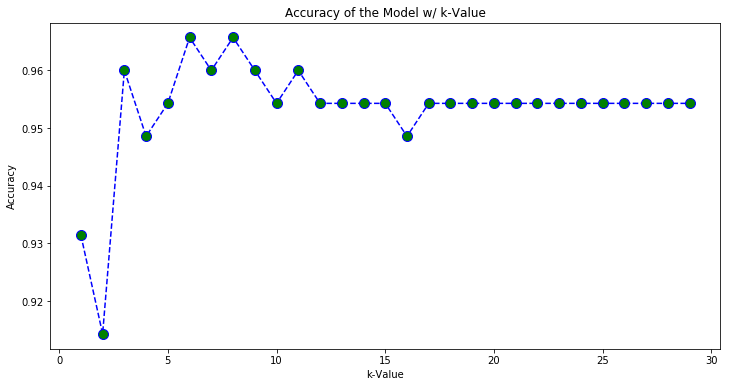

In [98]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), algorithm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [105]:
# Best possible k values seem to be in range(5,11), let's run that...

In [104]:
for k in range(5, 11):
    KNN_6 = KNeighborsClassifier(n_neighbors=k)
    KNN_6.fit(X_train, y_train)
    y_pred_6 = KNN_6.predict(X_test)
    print("Accuracy of the model with k =  :", k, metrics.accuracy_score(y_test, y_pred_6))

Accuracy of the model with k =  : 5 0.9542857142857143
Accuracy of the model with k =  : 6 0.9657142857142857
Accuracy of the model with k =  : 7 0.96
Accuracy of the model with k =  : 8 0.9657142857142857
Accuracy of the model with k =  : 9 0.96
Accuracy of the model with k =  : 10 0.9542857142857143


In [120]:
# Another approach would be to evaluate the data with error rates 

In [124]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

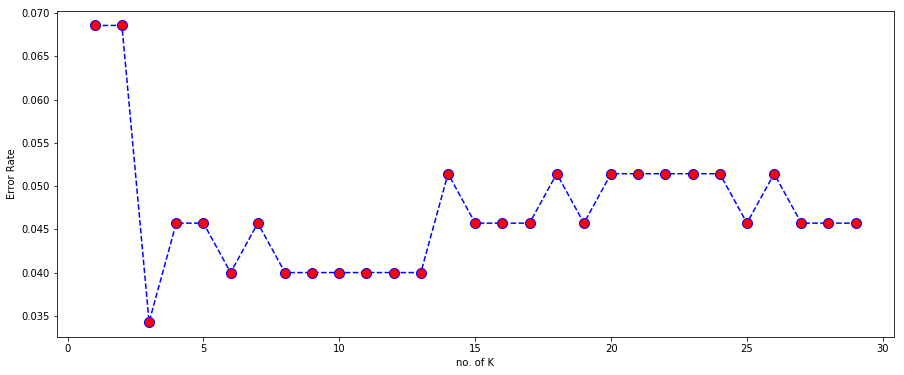

In [125]:
plt.figure(figsize=(15,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

In [126]:
# as displayed above, error rate by different k-values are the least when k is in range ~(6,14)
# as obtained before k = 6 and k = 8 had relatively higher accuracies so they are the better k-values 

In [132]:
# let' create a classification report for one of these k-values;
# after training the data with the best value and conclude...

In [133]:
from sklearn.metrics import classification_report

In [154]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[116   2]
 [  4  53]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.97       118
           4       0.96      0.93      0.95        57

   micro avg       0.97      0.97      0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



# - Weighted averages are all equal; 

- Precision = TP/TP+FP, of how many labeled did we label correctly?

- Recall = TP/TP+FN, of how many succeeded to take an action that we labeled correctly?

- F1 Score = 2*(Recall * Precision) / (Recall + Precision), use accuracy instead when uneven class distribution

In [155]:
# so this is relatively an even clas distribution

In [ ]:
### -> k-NN Algorithm Final Analysis
        
******************************************
- **OBSERVATIONS** :
******************************************
    - Best possible k-values differ in range(5,11)
    
    - MSE's of the selected area ensure us that best possible k-values tend to be either 6 or 8.
    
    - When k is too low such as k = 1, 2, 3; error rate is too high.Perhaps there are some lousy data;
    
        random noises that corrupt our analysis in that range.Otherwise, rather than extremely high k-values;
        
        smaller k's are usually expeced to behave better.
        
    - As k gets awa from the observed "safe range" - (5,11); error rate increases, our accuracy decreases 
    
        -> underfit model
        
        -> high bias in that case.
    
    - With k = 6 or 8; we can ensure that our model fits well and has low bias.
 
******************************************

# HW 1 finished...